In [1]:
# ## wordcloud 그리기 
# # %pip install wordcloud
# # %pip install nltk
# # %pip install pandas
# # %pip install numpy
# # %pip install konlpy
# ##################################################################

# import nltk
# from nltk.stem.porter import PorterStemmer
# from nltk.tokenize import RegexpTokenizer
# from nltk.corpus import stopwords
# import pandas as pd 
# from konlpy.tag import Hannanum
# hannanum = Hannanum()
# from wordcloud import WordCloud
# from collections import Counter

# f=open("..\\00.Data\\문재인대통령취임연설문_utf-8.txt",'r',encoding='utf-8')
# lines = f.readlines()
# f.close()

# lines01 = 'Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow'
# ##################################################################

# tokennizer = RegexpTokenizer('[\w]+')
# stop_words = stopwords.words('english')  # C:\\Users\\C20A-018\\AppData\\Roaming\\nltk_data\\corpora\\stopwords\\
# words = lines01.lower()
# # words = str(lines[0:5])
# tokens = tokennizer.tokenize(words)
# stoped_tokens = [i for i in list((tokens)) if not i in stop_words]
# stoped_tokens2 = [i for i in stoped_tokens if len(i) > 1]
# pd.Series(stoped_tokens2).value_counts().head(10)
# ##################################################################
# # lines
# temp = []
# for i in range(len(lines)):
#     temp.append(hannanum.nouns(lines[i]))
#     temp = list(filter(bool, temp))
    
# def flatten(l):
#     flatList = []
#     for elem in l:
#         if type(elem) == list:
#             for e in elem:
#                 flatList.append(e)
#         else:
#             flatList.append(elem)
#     return flatList

# word_list = flatten(temp)
# word_list=pd.Series([x for x in word_list if len(x)> 1])
# word_list.value_counts().head(10)
    
# # dir(word_list)
# ##################################################################
# font_path = 'D://app_src/anaconda/06-font/나눔바른고딕/CJnXlA0w_D7iilTV5nZ2CsjiEBQ.ttf'
# wordcloud = WordCloud(
#     font_path = font_path,
#     width=800,
#     height=800,
#     background_color="white"
# )

# count = Counter(stoped_tokens2)
# wordcloud = wordcloud.generate_from_frequencies(count)

# def __array__(self):
#     return self.to_array()
#     """Convert to numpy array. Returns
#         image : nd-array size (width, height, 3), Word cloud image as numpy matrix."""
    
# def to_array(self):
#     return np.array(self.to_image())
#     """Convert to numpy array. Returns 
#        image : nd-array size(width, height,3), Word cloud image as numpy matrix."""
    
# # array = wordcloud.to_array()

# import matplotlib.pyplot as plt 

# # fig = plt.figure(figsize=(10,10))
# # plt.imshow(array,interpolation="bilinear")
# # plt.show()
# # fig.savefig('wordcloud.png')


# count = Counter(word_list)
# wordcloud = wordcloud.generate_from_frequencies(count)
# array = wordcloud.to_array()

# fig = plt.figure(figsize=(10,10))
# plt.imshow(array, interpolation='bilinear')
# plt.show()
# fig.savefig('word_list_cloud.png')

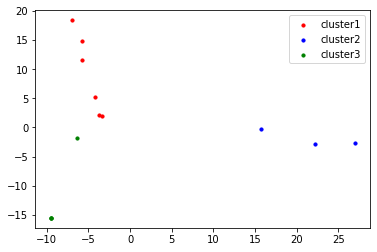

In [5]:
# # Part2 qunji jisuan 
# # %pip install sklearn
# # k평균 군집합 

# import pandas as pd
# from konlpy.tag import Hannanum
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.cluster import KMeans

# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt 
# import re


# hannanum = Hannanum()

# Data = pd.read_csv('./newsTest/test001.csv',engine="python")


# docs = []
# for i in Data['data']:
#     docs.append(hannanum.nouns(i))
    
# docs = [x for x in docs if len(x)> 1 ]

# for i in range(len(docs)):
#     docs[i] = ' '.join(docs[i])
    
# vec = CountVectorizer()
# X= vec.fit_transform(docs)
# df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
# kmeans = KMeans(n_clusters=3).fit(df)

# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(df)
# principalComponents
# principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1','principal component 2'])
# principalDf.index=Data['search']
# plt.scatter(principalDf.iloc[kmeans.labels_ == 0, 0], principalDf.iloc[kmeans.labels_ ==0,1], s = 10, c='red',label='cluster1')
# plt.scatter(principalDf.iloc[kmeans.labels_ == 1, 0], principalDf.iloc[kmeans.labels_ ==1,1], s = 10, c='blue',label='cluster2')
# plt.scatter(principalDf.iloc[kmeans.labels_ == 2, 0], principalDf.iloc[kmeans.labels_ ==2,1], s = 10, c='green',label='cluster3')
# plt.legend()


In [67]:
# # %pip install gensim
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer
import pandas as pd

tokenizer = RegexpTokenizer('\w+')
# C:\Users\C20A-018\AppData\Roaming\nltk_data\corpora\stopwords\korean
stop_words = stopwords.words('korean')  # C:\\Users\\C20A-018\\AppData\\Roaming\\nltk_data\\corpora\\stopwords\\
stop_words

p_stemmer = PorterStemmer()
Data = pd.read_csv('./newsTest/test001.csv',engine="python")
Data

doc_a = Data['data'][0]
doc_b = Data['data'][1]
doc_c = Data['data'][2]
doc_d = Data['data'][3]
doc_e = Data['data'][4]
doc_f = Data['data'][5]
doc_g = Data['data'][6]
doc_h = Data['data'][7]
doc_i = Data['data'][8]
doc_j = Data['data'][9]

doc_set = [doc_a ,doc_b ,doc_c ,doc_d ,doc_e ,doc_f ,doc_g ,doc_h ,doc_i ,doc_j]
texts = []
for w in doc_set:
    raw = w
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)

texts = [x for x in texts if len(x) >= 2]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary)
ldamodel.print_topics(num_words=5)

# ldamodel.get_document_topics(corpus)[0] 




[(0, '0.011*"최저임금" + 0.007*"3" + 0.006*"5" + 0.006*"0" + 0.006*"내년"'),
 (1, '0.007*"임상" + 0.005*"결과를" + 0.005*"미국" + 0.005*"암앤해머" + 0.004*"중"'),
 (2, '0.006*"암앤해머" + 0.005*"레이저티닙" + 0.004*"세탁세제를" + 0.004*"미국" + 0.004*"대한"')]